In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## Drop Columns

In [4]:
cols_to_drop = [col for col in ['Row ID', 'Customer ID', 'Order ID', 'Postal Code', 'Product ID'] if col in df.columns]
df = df.drop(columns=cols_to_drop)

In [5]:
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/21/2014,1/23/2014,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,2/26/2017,3/3/2017,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,2/26/2017,3/3/2017,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,2/26/2017,3/3/2017,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## Duplicated Drop

In [6]:
df.duplicated().sum()

1

In [7]:
df = df.drop_duplicates()

## Missing Values Check

In [8]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## dtypes Check

In [9]:
df.dtypes

Order Date        object
Ship Date         object
Ship Mode         object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Region            object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

## Categorical Columns

In [10]:
categorical_cols = df.select_dtypes(include='object').columns

## Numerical Columns

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

## Describe

In [12]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## Summary
    After generating descriptive statistics and previewing the dataset, it was observed that the Superstore data is mostly clean and well-     structured.
     All key numerical variables such as Sales, Quantity, Discount, and Profit have valid values, although some extreme profits and losses suggest the presence of outliers.
      There are no missing values in the dataset, and all data types were correctly formatted after converting Order Date and Ship Date to datetime type.
     A few duplicate rows were found and removed to maintain accuracy.
    Overall, the dataset appears reliable, but further investigation into the outliers and unusually high discounts will be performed during data cleaning.

# HANDLING MISSING DATA

In [15]:
df.isnull().sum()

(df.isnull().mean() * 100).round(2)


Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Region           0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
dtype: float64

In [13]:
!pip install missingno


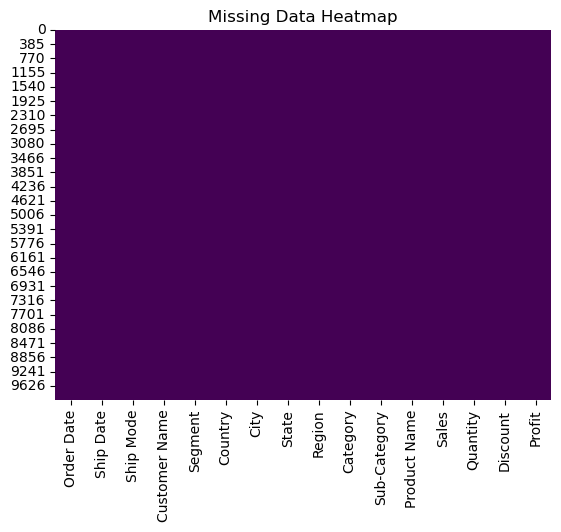

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()



##  Exploring Data Characteristics

<Axes: xlabel='Category', ylabel='Sales'>

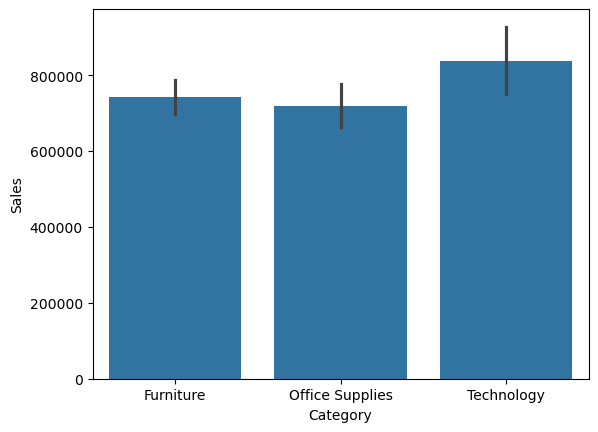

In [24]:
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)

<Axes: title={'center': 'Top 10 Sub-Categories by Total Sales'}, ylabel='Sub-Category'>

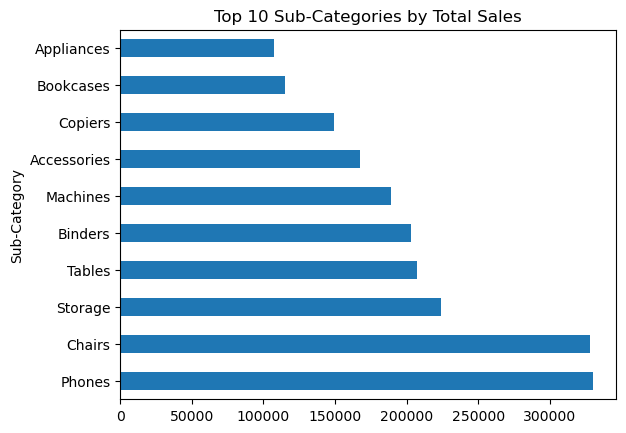

In [25]:
top_sub = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
top_sub.plot(kind='barh', title='Top 10 Sub-Categories by Total Sales')

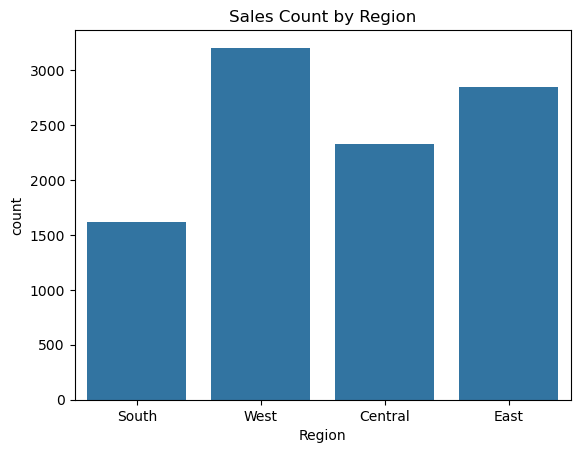

In [51]:
sns.countplot(x='Region', data=df)
plt.title("Sales Count by Region")
plt.show()

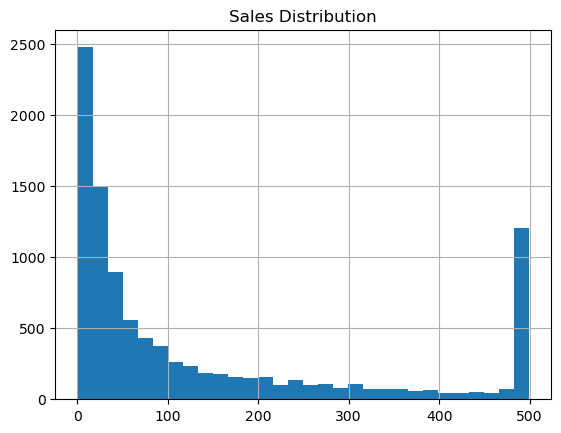

In [52]:
df['Sales'].hist(bins=30)
plt.title("Sales Distribution")
plt.show()

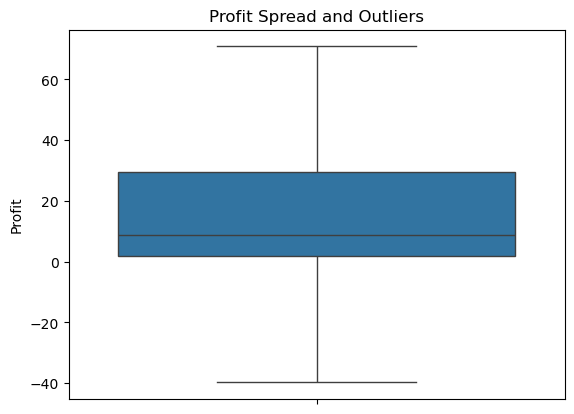

In [53]:
sns.boxplot(y='Profit', data=df)
plt.title("Profit Spread and Outliers")
plt.show()

In [18]:
mean_values = df[['Sales', 'Profit', 'Discount', 'Quantity']].mean()
median_values = df[['Sales', 'Profit', 'Discount', 'Quantity']].median()
mode_values = df[['Sales', 'Profit', 'Discount', 'Quantity']].mode().iloc[0]

In [19]:
std_values = df[['Sales', 'Profit', 'Discount', 'Quantity']].std()
var_values = df[['Sales', 'Profit', 'Discount', 'Quantity']].var()
range_values = df[['Sales', 'Profit', 'Discount', 'Quantity']].max() - df[['Sales', 'Profit', 'Discount', 'Quantity']].min()
iqr_values = df[['Sales', 'Profit', 'Discount', 'Quantity']].quantile(0.75) - df[['Sales', 'Profit', 'Discount', 'Quantity']].quantile(0.25)

In [20]:
skewness = df[['Sales', 'Profit', 'Discount', 'Quantity']].skew()
kurtosis = df[['Sales', 'Profit', 'Discount', 'Quantity']].kurt()

In [21]:
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Std Dev': std_values,
    'Variance': var_values,
    'Range': range_values,
    'IQR': iqr_values,
    'Skewness': skewness,
    'Kurtosis': kurtosis
})
print("📊 Summary Statistics:")
display(summary_stats.round(3))

📊 Summary Statistics:


,Mean,Median,Mode,Std Dev,Variance,Range,IQR,Skewness,Kurtosis
Sales,229.853,54.480,12.96,623.276,388473.064,22638.036,192.660,12.972,305.282
Profit,28.661,8.671,0.00,234.271,54883.124,14999.954,27.633,7.561,397.150
Discount,0.156,0.200,0.00,0.206,0.043,0.800,0.200,1.685,2.410
Quantity,3.790,3.000,3.00,2.225,4.951,13.000,3.000,1.278,1.992


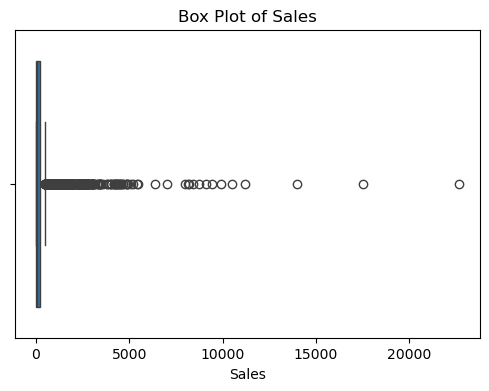

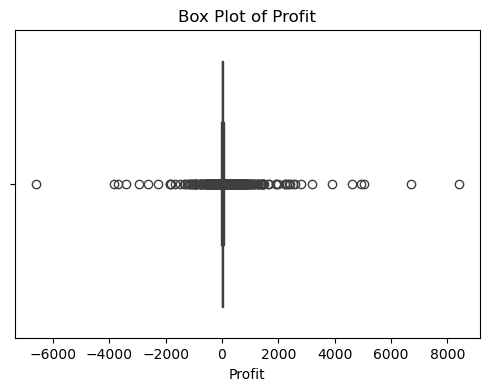

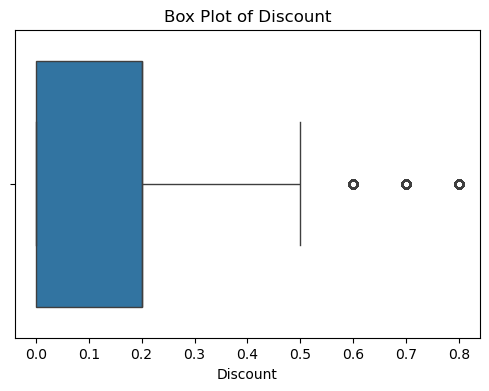

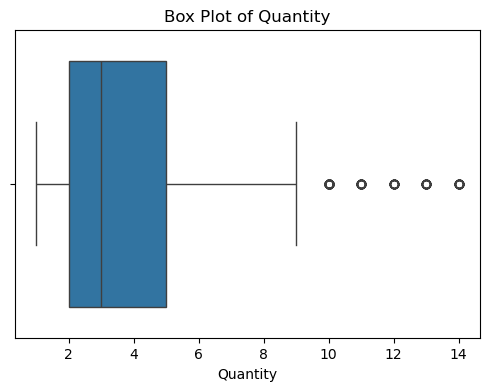

In [22]:
for col in ['Sales', 'Profit', 'Discount', 'Quantity']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

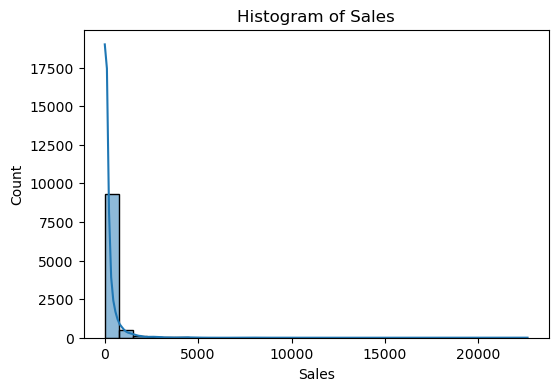

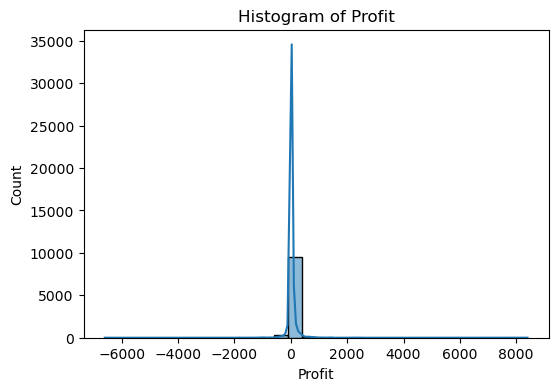

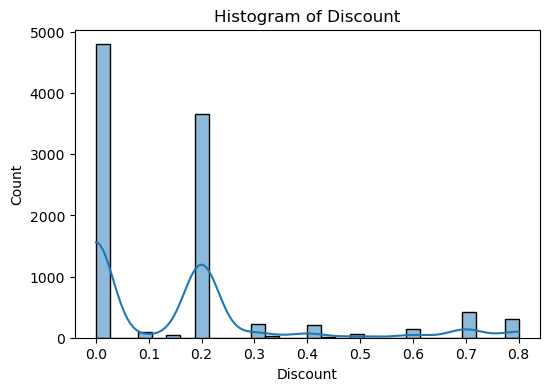

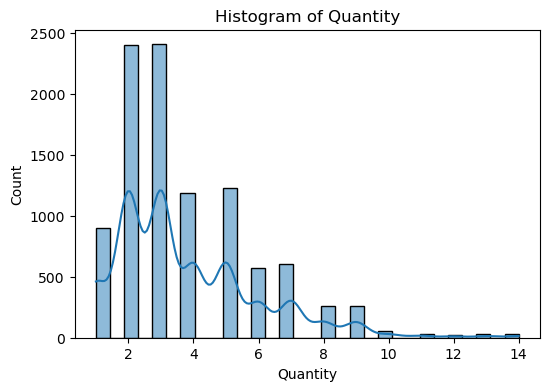

In [23]:
for col in ['Sales', 'Profit', 'Discount', 'Quantity']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.show()

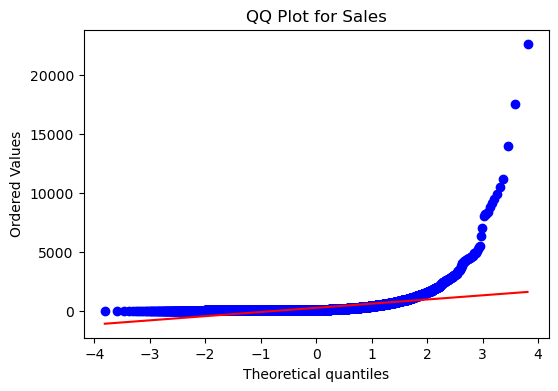

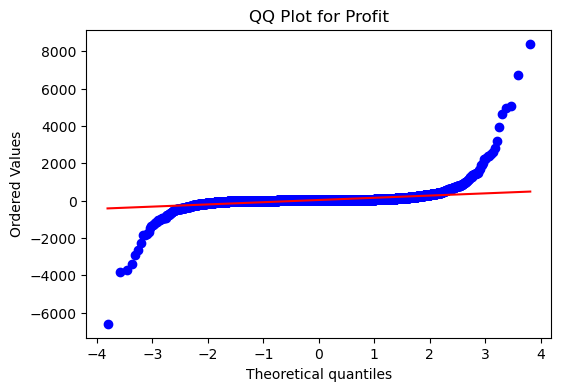

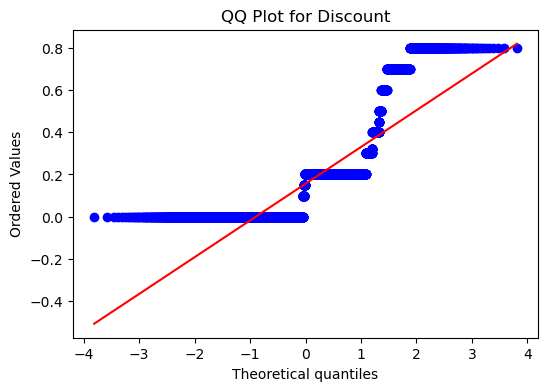

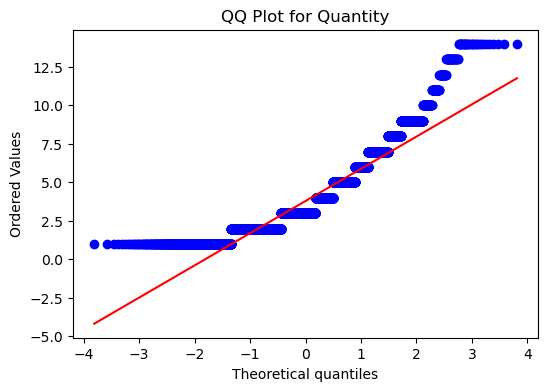

In [24]:
import scipy.stats as stats
for col in ['Sales', 'Profit', 'Discount', 'Quantity']:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col}')
    plt.show()


In [25]:
z_scores = np.abs(stats.zscore(df[['Sales', 'Profit', 'Discount', 'Quantity']]))
outliers_z = (z_scores > 3).sum()
print("\n🔍 Outliers detected using Z-Score method (>|3|):")
print(outliers_z)

# b. IQR method
Q1 = df[['Sales', 'Profit', 'Discount', 'Quantity']].quantile(0.25)
Q3 = df[['Sales', 'Profit', 'Discount', 'Quantity']].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[['Sales', 'Profit', 'Discount', 'Quantity']] < (Q1 - 1.5 * IQR)) | 
                (df[['Sales', 'Profit', 'Discount', 'Quantity']] > (Q3 + 1.5 * IQR))).sum()
print("\n🔍 Outliers detected using IQR method:")
print(outliers_iqr)


🔍 Outliers detected using Z-Score method (>|3|):
Sales       127
Profit      107
Discount    300
Quantity    113
dtype: int64

🔍 Outliers detected using IQR method:
Sales       1167
Profit      1881
Discount     856
Quantity     170
dtype: int64


## summary
This analysis calculated key summary statistics, visualized data distributions, and detected outliers using Z-score and IQR methods. It helped identify the data’s central tendency, spread, skewness, normality, and presence of outliers for further cleaning and modeling.

# Visualizing the Relationship of Data

In [32]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

## Bar Plot

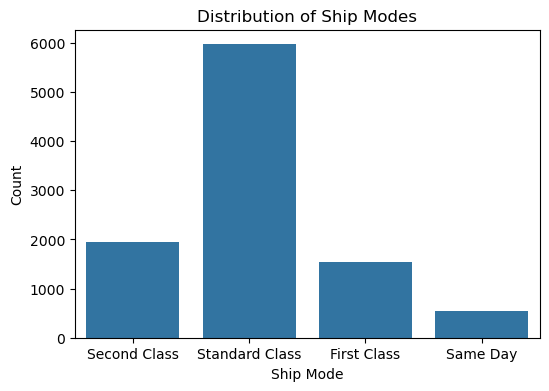

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x='Ship Mode', data=df)
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

## Pie Chart

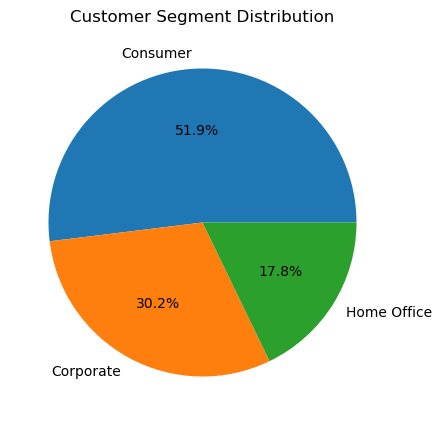

In [35]:
df['Segment'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(5,5), title='Customer Segment Distribution')
plt.ylabel('')
plt.show()

## Visualizing Numerical Variables

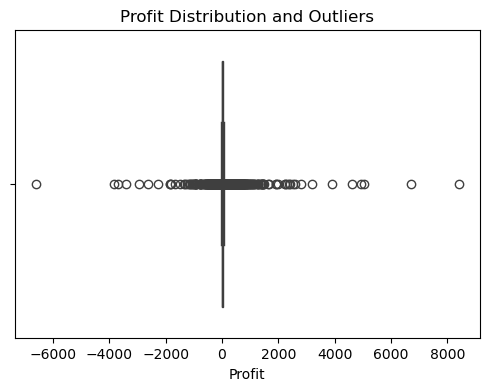

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Profit'])
plt.title('Profit Distribution and Outliers')
plt.show()

## Visualizing Relationships Between Variables

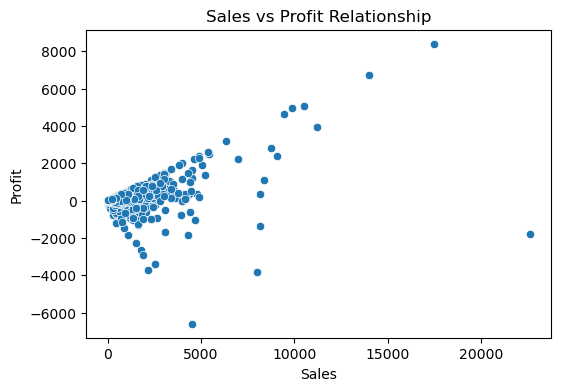

In [38]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit Relationship')
plt.show()

## Correlation Matrix

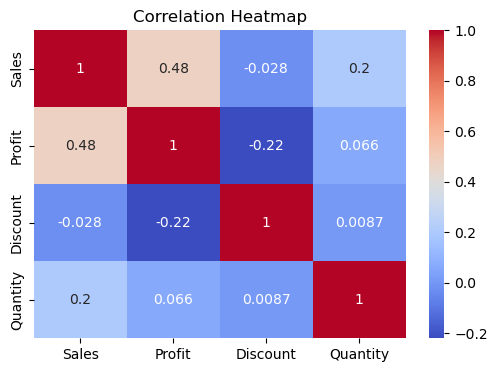

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales','Profit','Discount','Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Pair Plot

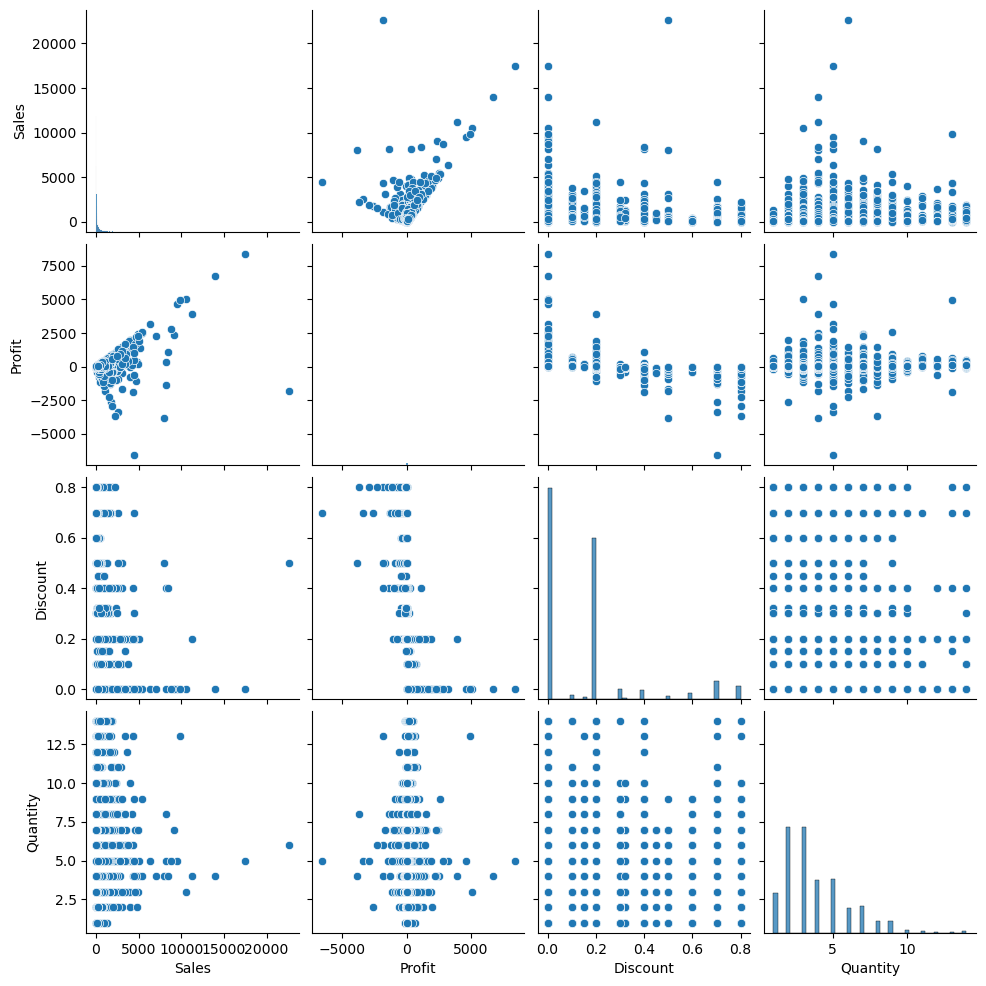

In [42]:
sns.pairplot(df[['Sales','Profit','Discount','Quantity']])
plt.show()

# Handling Outliers

In [44]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f"{col}: {len(outliers)} outliers")

Sales: 1167 outliers
Quantity: 170 outliers
Discount: 856 outliers
Profit: 1881 outliers


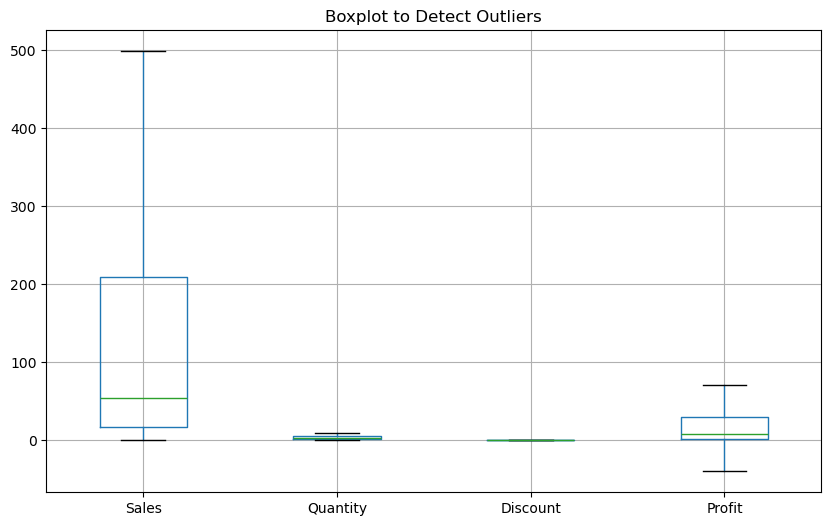

In [48]:
plt.figure(figsize=(10, 6))
df[numerical_cols].boxplot()
plt.title("Boxplot to Detect Outliers")
plt.show()

#  Communicate Findings and Insights

### Goals and Scope

      Purpose: To analyze Superstore sales data and identify patterns affecting profit and performance.

     Data Used: Superstore dataset (includes sales, profit, category, region, and customer segments).

    Scope : Focused on sales and profitability trends across categories, regions, and customer segments during the selected period.

    Goal: To uncover key drivers of high sales and profit, and highlight improvement areas.

### Key Insights & Patterns

    Sales Trend: Technology category generated the highest total sales, followed by Furniture.

    Profitability: Some sub-categories (e.g., Phones, Chairs) contributed most to profits, while Tables showed lower profit margins.

    Regional Insights: The West region showed the highest overall sales and profit.

    Outliers: A few large sales transactions caused right-skewed distributions.

    Relationships: Positive correlation found between Sales and Profit, though high discounts reduced profitability.

### Limitations & Challenges

    Missing or inconsistent data required cleaning before analysis.

    Presence of outliers slightly affected mean-based metrics.

    Dataset covered limited time and business scope — may not reflect all market conditions.

    Some features lacked complete information for deeper trend analysis.